# Vehicle Type Classification with **Multinomial Logistic Regression**

## Loading, Scaling, Baseline Model

Loading the data

In [11]:
import pandas as pd

# Load the dataset
file_path = "/Users/jakob/Library/CloudStorage/OneDrive-student.kit.edu/Studium/02_Master/4. Semester/seminar/RoadTrafficNoise/IDMT-Traffic/datasets/df_main_encoded_only.csv"

# Load the dataset
df_vehicle_classification = pd.read_csv(file_path)

# Display the first few rows
print(df_vehicle_classification.head())

# Check column names and data types
print(df_vehicle_classification.info())

   Unnamed: 0                                               file  \
0          18  2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1116695...   
1          19  2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1116695...   
2          20  2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1137602...   
3          21  2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1137602...   
4          24  2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1141442...   

   is_background_encoded  date_time_encoded  location_encoded  \
0                      0                  0                 0   
1                      0                  0                 0   
2                      0                  0                 0   
3                      0                  0                 0   
4                      0                  0                 0   

   speed_kmh_encoded  daytime_encoded  weather_encoded  vehicle_encoded  \
0                  0                1                0                1   
1                  0                1             

Scaling the audio features

In [3]:
from sklearn.preprocessing import StandardScaler

# List of features to scale
features_to_scale = [
    'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8',
    'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'band_1_dB', 'band_2_dB',
    'band_3_dB', 'band_4_dB', 'band_5_dB', 'band_6_dB', 'band_7_dB', 'band_8_dB',
    'band_9_dB', 'band_10_dB', 'band_11_dB', 'band_12_dB', 'band_13_dB', 'band_14_dB',
    'band_15_dB', 'band_16_dB', 'band_17_dB', 'band_18_dB', 'band_19_dB', 'band_20_dB',
    'band_21_dB', 'band_22_dB', 'band_23_dB', 'band_24_dB', 'band_25_dB', 'band_26_dB',
    'band_27_dB', 'band_28_dB', 'band_29_dB', 'peak_dB_1', 'peak_freq_1', 'peak_dB_2',
    'peak_freq_2', 'peak_dB_3', 'peak_freq_3', 'octband_dB_mean'
]

# Initialize the scaler
scaler = StandardScaler()

# Scale the continuous features
df_vehicle_classification[features_to_scale] = scaler.fit_transform(df_vehicle_classification[features_to_scale])

# Display the first few rows of the scaled features
print("Scaled continuous features:")
print(df_vehicle_classification[features_to_scale].head())

Scaled continuous features:
     mfcc_1    mfcc_2    mfcc_3    mfcc_4    mfcc_5    mfcc_6    mfcc_7  \
0  0.534020 -0.095741  0.317090 -0.199996  1.076871 -0.849158  0.488469   
1 -0.417122  1.236136 -0.463359 -1.258648  0.673683 -2.817347 -1.025860   
2 -0.349961 -0.063312  1.486191  0.617049  1.425379 -0.200482  0.469514   
3 -0.359639  1.370129  0.446450 -0.780061  0.581897 -1.698731 -0.685670   
4 -0.478630 -0.377287  0.783887  1.585644  1.316984  0.916741  0.646383   

     mfcc_8    mfcc_9   mfcc_10  ...  band_27_dB  band_28_dB  band_29_dB  \
0  1.043540  0.232010 -0.497859  ...    0.637304    1.046642    1.040365   
1  0.391742 -0.823542 -2.020080  ...    0.311370    0.580304    0.686623   
2  0.924568  1.123851  0.496119  ...    0.283491    0.677777    0.912659   
3 -0.260536 -0.622390 -1.076207  ...   -0.106405    0.103776    0.330144   
4  1.487036  2.385029  0.324056  ...    1.097757    0.985525    0.976381   

   peak_dB_1  peak_freq_1  peak_dB_2  peak_freq_2  peak_dB_3  pe

Standard LogReg Model with all 4 vehicle classes:

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Extract features and target
X = df_vehicle_classification.drop(columns=['file', 'vehicle_encoded', 'is_background_encoded', 'Unnamed: 0', 'date_time_encoded'])  # Drop columns that could lead to data leakage or are not useful
y = df_vehicle_classification['vehicle_encoded']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Test Set Evaluation:")
print(classification_report(y_test, y_pred))

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.93      0.99      0.96      1561
           2       0.99      0.99      0.99        86
           3       0.78      0.41      0.54       205

    accuracy                           0.92      1873
   macro avg       0.90      0.80      0.83      1873
weighted avg       0.91      0.92      0.91      1873



Standard LogReg Model without vehicle class 3 (Trucks), because of faulty data in that class:

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Filter out rows where vehicle_encoded == 3
df_filtered = df_vehicle_classification[df_vehicle_classification['vehicle_encoded'] != 3]

# Extract features and target
X = df_filtered.drop(columns=['file', 'vehicle_encoded', 'is_background_encoded', 'Unnamed: 0', 'date_time_encoded'])  # Drop columns that could lead to data leakage or are not useful

# Extract the target variable
y = df_filtered['vehicle_encoded']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Test Set Evaluation:")
print(classification_report(y_test, y_pred))

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       1.00      1.00      1.00      1561
           2       1.00      0.99      0.99        86

    accuracy                           1.00      1668
   macro avg       0.96      0.93      0.95      1668
weighted avg       1.00      1.00      1.00      1668



/Users/jakob/miniconda3/envs/seminar2024/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Experimenting

Which coefficients are the most important?

In [41]:
# Extract coefficients from the trained logistic regression model
coefficients = pd.Series(log_reg.coef_[0], index=X.columns)

# Sort the coefficients in descending order
sorted_coefficients = coefficients.sort_values(ascending=False)

# Print the sorted coefficients
print(sorted_coefficients)

location_encoded            1.304087
band_2_dB                   1.226060
band_7_dB                   0.799348
band_19_dB                  0.783245
peak_dB_3                   0.703527
band_6_dB                   0.654890
band_21_dB                  0.517614
band_12_dB                  0.490918
mfcc_4                      0.385726
band_17_dB                  0.345514
band_18_dB                  0.333967
mfcc_3                      0.312213
mfcc_9                      0.270958
band_11_dB                  0.227489
daytime_encoded             0.223317
peak_freq_3                 0.178655
band_5_dB                   0.145266
peak_dB_2                   0.130082
band_3_dB                   0.125363
mfcc_12                     0.113185
mfcc_1                      0.064637
mfcc_8                      0.063139
source_direction_encoded    0.061755
peak_freq_1                 0.048427
mfcc_11                     0.047891
octband_dB_mean             0.020652
band_10_dB                  0.017369
b

Trying SMOTE: no improvement, worse results

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Filter out rows where vehicle_encoded == 3
df_filtered = df_vehicle_classification[df_vehicle_classification['vehicle_encoded'] != 3]

# Extract features and target
X = df_filtered.drop(columns=['file', 'vehicle_encoded', 'is_background_encoded', 'Unnamed: 0', 'date_time_encoded'])  # Drop columns that could lead to data leakage or are not useful

# Extract the target variable
y = df_filtered['vehicle_encoded']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Test Set Evaluation:")
print(classification_report(y_test, y_pred))

/Users/jakob/miniconda3/envs/seminar2024/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.50      0.95      0.66        21
           1       1.00      0.99      0.99      1561
           2       1.00      1.00      1.00        86

    accuracy                           0.99      1668
   macro avg       0.83      0.98      0.88      1668
weighted avg       0.99      0.99      0.99      1668



Adding RFECV before model training:

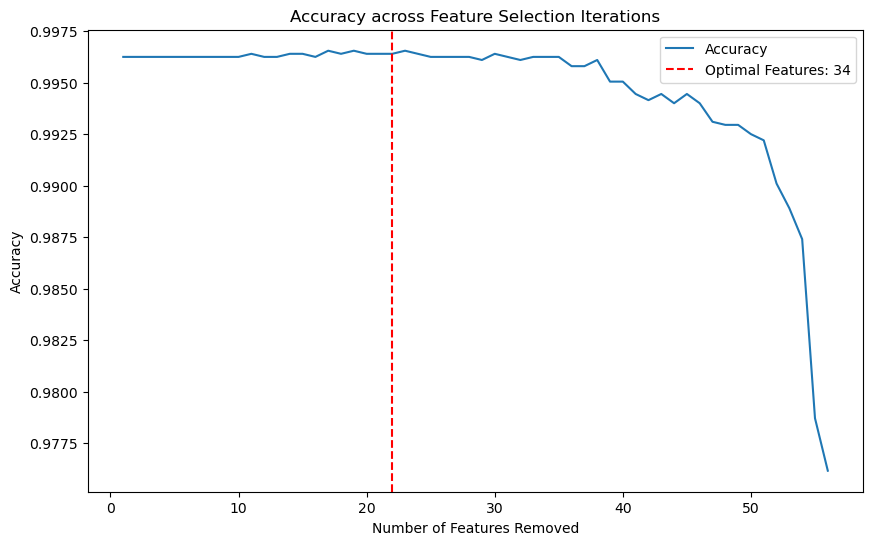

Optimal Feature Set:
Index(['location_encoded', 'speed_kmh_encoded', 'weather_encoded',
       'source_direction_encoded', 'microphone_encoded', 'channel_encoded',
       'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_8', 'mfcc_12', 'mfcc_13',
       'band_1_dB', 'band_2_dB', 'band_3_dB', 'band_4_dB', 'band_5_dB',
       'band_6_dB', 'band_7_dB', 'band_9_dB', 'band_10_dB', 'band_11_dB',
       'band_12_dB', 'band_14_dB', 'band_16_dB', 'band_17_dB', 'band_18_dB',
       'band_21_dB', 'band_22_dB', 'band_25_dB', 'band_26_dB', 'peak_dB_2',
       'peak_dB_3'],
      dtype='object')
Test Set Evaluation with Optimal Features:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       1.00      1.00      1.00      1561
           2       1.00      0.99      0.99        86

    accuracy                           1.00      1668
   macro avg       0.98      0.95      0.96      1668
weighted avg       1.00      1.00      1.00   

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

# Filter out rows where vehicle_encoded == 3
df_filtered = df_vehicle_classification[df_vehicle_classification['vehicle_encoded'] != 3]

# Extract features and target
X = df_filtered.drop(columns=['file', 'vehicle_encoded', 'is_background_encoded', 'Unnamed: 0', 'date_time_encoded'])  # Drop columns that could lead to data leakage or are not useful

# Extract the target variable
y = df_filtered['vehicle_encoded']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Use Recursive Feature Elimination with Cross-Validation (RFECV) to select features
rfecv = RFECV(estimator=log_reg, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

# Calculate the number of features removed at each step
features_removed = [len(X_train.columns) - n for n in range(len(rfecv.cv_results_['mean_test_score']))]

# Find the optimal number of features
optimal_num_features = len(X_train.columns) - rfecv.n_features_

# Plot the accuracy across iterations
plt.figure(figsize=(10, 6))
sns.lineplot(x=features_removed, y=rfecv.cv_results_['mean_test_score'], label="Accuracy")
plt.axvline(x=optimal_num_features, color='red', linestyle='--', label=f"Optimal Features: {rfecv.n_features_}")
plt.xlabel("Number of Features Removed")
plt.ylabel("Accuracy")
plt.title("Accuracy across Feature Selection Iterations")
plt.legend()
plt.show()

# Optimal feature set
optimal_features = X_train.columns[rfecv.support_]
print("Optimal Feature Set:")
print(optimal_features)

# Train the model with the optimal features
X_train_optimal = rfecv.transform(X_train)
X_test_optimal = rfecv.transform(X_test)
log_reg.fit(X_train_optimal, y_train)

# Make predictions and evaluate
y_pred_optimal = log_reg.predict(X_test_optimal)
print("Test Set Evaluation with Optimal Features:")
print(classification_report(y_test, y_pred_optimal))

Confusion Matrix:
[[  18    3    0]
 [   1 1560    0]
 [   0    1   85]]


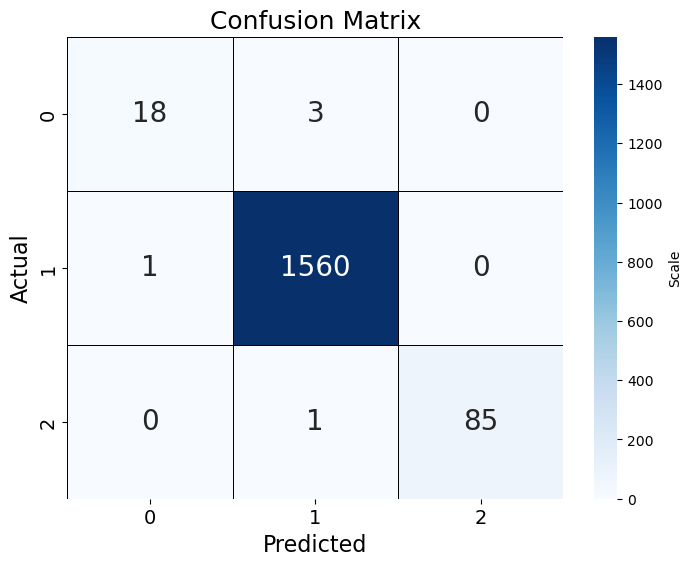

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
y_pred = log_reg.predict(X_test_optimal)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2], annot_kws={"size": 20}, cbar_kws={'label': 'Scale'}, linewidths=0.5, linecolor='black')
plt.xlabel("Predicted", fontsize=16)
plt.ylabel("Actual", fontsize=16)
plt.title("Confusion Matrix", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Why Doesn’t RFECV Pick the Highest Accuracy?

1. Default Behavior:
	- RFECV minimizes overfitting by not selecting unnecessary features, even if they result in marginally higher accuracy.
	- It aims to optimize the number of features versus accuracy tradeoff.

2.	Mean Cross-Validation Accuracy:
	- RFECV selects the feature subset that performs the best on the average cross-validation score, which is often slightly different from the highest test accuracy observed in the curve.

Adding hyperparameter tuning with GridSearchCV

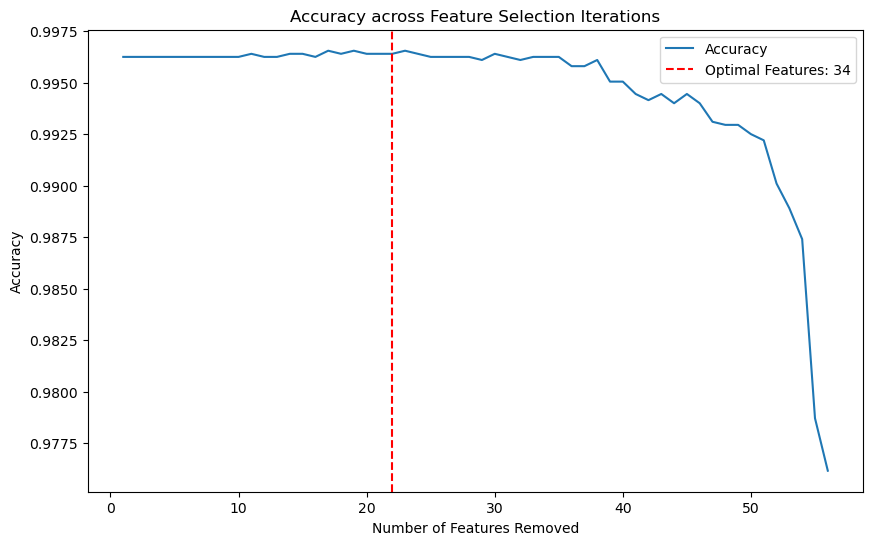

Optimal Feature Set:
Index(['location_encoded', 'speed_kmh_encoded', 'weather_encoded',
       'source_direction_encoded', 'microphone_encoded', 'channel_encoded',
       'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_8', 'mfcc_12', 'mfcc_13',
       'band_1_dB', 'band_2_dB', 'band_3_dB', 'band_4_dB', 'band_5_dB',
       'band_6_dB', 'band_7_dB', 'band_9_dB', 'band_10_dB', 'band_11_dB',
       'band_12_dB', 'band_14_dB', 'band_16_dB', 'band_17_dB', 'band_18_dB',
       'band_21_dB', 'band_22_dB', 'band_25_dB', 'band_26_dB', 'peak_dB_2',
       'peak_dB_3'],
      dtype='object')


/Users/jakob/miniconda3/envs/seminar2024/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jakob/miniconda3/envs/seminar2024/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jakob/miniconda3/envs/seminar2024/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jakob/miniconda3/envs/seminar2024/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jakob/miniconda3/envs/seminar2024/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Test Set Evaluation with Tuned Model:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       1.00      1.00      1.00      1561
           2       1.00      0.99      0.99        86

    accuracy                           1.00      1668
   macro avg       0.98      0.95      0.96      1668
weighted avg       1.00      1.00      1.00      1668



/Users/jakob/miniconda3/envs/seminar2024/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

# Filter out rows where vehicle_encoded == 3
df_filtered = df_vehicle_classification[df_vehicle_classification['vehicle_encoded'] != 3]

# Extract features and target
X = df_filtered.drop(columns=['file', 'vehicle_encoded', 'is_background_encoded', 'Unnamed: 0', 'date_time_encoded'])  # Drop columns that could lead to data leakage or are not useful

# Extract the target variable
y = df_filtered['vehicle_encoded']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=2000, random_state=42)

# Use Recursive Feature Elimination with Cross-Validation (RFECV) to select features
rfecv = RFECV(estimator=log_reg, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

# Calculate the number of features removed at each step
features_removed = [len(X_train.columns) - n for n in range(len(rfecv.cv_results_['mean_test_score']))]

# Find the optimal number of features
optimal_num_features = len(X_train.columns) - rfecv.n_features_

# Plot the accuracy across iterations
plt.figure(figsize=(10, 6))
sns.lineplot(x=features_removed, y=rfecv.cv_results_['mean_test_score'], label="Accuracy")
plt.axvline(x=optimal_num_features, color='red', linestyle='--', label=f"Optimal Features: {rfecv.n_features_}")
plt.xlabel("Number of Features Removed")
plt.ylabel("Accuracy")
plt.title("Accuracy across Feature Selection Iterations")
plt.legend()
plt.show()

# Optimal feature set
optimal_features = X_train.columns[rfecv.support_]
print("Optimal Feature Set:")
print(optimal_features)

# Train the model with the optimal features
X_train_optimal = rfecv.transform(X_train)
X_test_optimal = rfecv.transform(X_test)

param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Wider range of regularization strengths
    'solver': ['lbfgs', 'saga', 'newton-cg'],  # Include solvers suitable for multiclass problems
    'penalty': ['l2', 'none'],  # Explore penalty types (L2 or no regularization)
    'max_iter': [100, 500, 1000, 1500]  # Test different convergence limits
}

grid_search = GridSearchCV(LogisticRegression(max_iter=2000, random_state=42),
                           param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_optimal, y_train)

# Get best parameters and retrain the model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
log_reg_tuned = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = log_reg_tuned.predict(X_test_optimal)
print("Test Set Evaluation with Tuned Model:")
print(classification_report(y_test, y_pred_tuned))


-> Hyperparameter tuning didn't improve the performance on the test set compared to without it.

## Best Model

Using "balanced_accuracy" as the scoring metric for RFECV, without hyperparameter tuning:

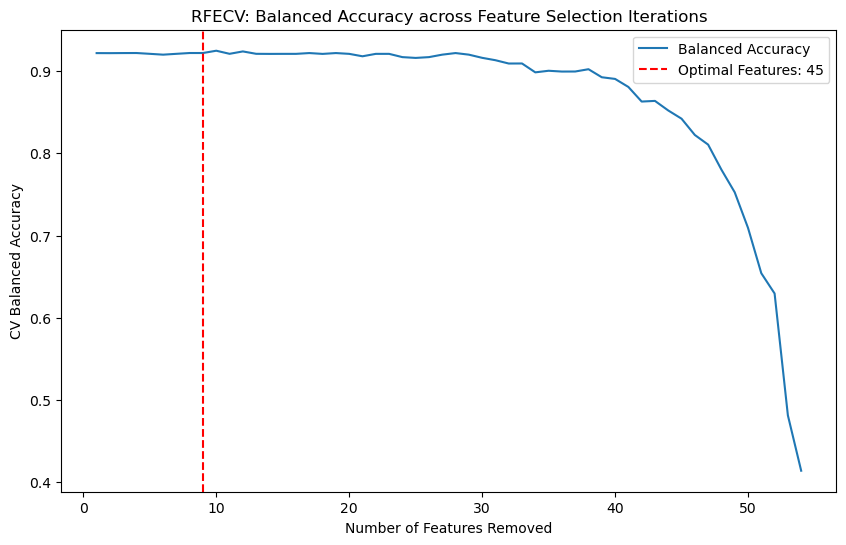

Optimal Feature Set:
Index(['daytime_encoded', 'weather_encoded', 'source_direction_encoded',
       'microphone_encoded', 'channel_encoded', 'mfcc_1', 'mfcc_2', 'mfcc_3',
       'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10',
       'mfcc_11', 'mfcc_12', 'mfcc_13', 'band_2_dB', 'band_3_dB', 'band_4_dB',
       'band_5_dB', 'band_6_dB', 'band_7_dB', 'band_8_dB', 'band_9_dB',
       'band_10_dB', 'band_11_dB', 'band_12_dB', 'band_14_dB', 'band_16_dB',
       'band_18_dB', 'band_19_dB', 'band_20_dB', 'band_21_dB', 'band_22_dB',
       'band_23_dB', 'band_25_dB', 'band_26_dB', 'band_27_dB', 'band_28_dB',
       'band_29_dB', 'peak_dB_1', 'peak_dB_2', 'peak_dB_3'],
      dtype='object')

Test Set Evaluation with Optimal Features:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.99      1.00      1.00      1561
           2       0.99      0.97      0.98        86

    accuracy           

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# 1) Load + Filter the Dataset
# Filter out rows where vehicle_encoded == 3
df_filtered = df_vehicle_classification[df_vehicle_classification['vehicle_encoded'] != 3]

# Extract features and target
X = df_filtered.drop(columns=['file', 'vehicle_encoded', 'is_background_encoded', 
                              'Unnamed: 0', 'date_time_encoded', 'location_encoded', 'speed_kmh_encoded'])
y = df_filtered['vehicle_encoded']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# 2) Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 3) Set up Logistic Regression
#    with higher max_iter
log_reg = LogisticRegression(
    solver='lbfgs', 
    max_iter=10000,   # Increased to avoid convergence warnings
    random_state=42
)

# 4) Feature Selection via RFECV
rfecv = RFECV(
    estimator=log_reg,
    step=1,
    cv=5,
    scoring='balanced_accuracy'
)
rfecv.fit(X_train_scaled, y_train)

# Identify the number of features removed at each iteration
features_removed = [
    X_train.shape[1] - n 
    for n in range(len(rfecv.cv_results_['mean_test_score']))
]

# Find the optimal number of features
optimal_num_features = X_train.shape[1] - rfecv.n_features_

# 5) Plot the RFECV Performance
plt.figure(figsize=(10, 6))
sns.lineplot(x=features_removed, y=rfecv.cv_results_['mean_test_score'], label="Balanced Accuracy")
plt.axvline(x=optimal_num_features, color='red', linestyle='--', 
            label=f"Optimal Features: {rfecv.n_features_}")
plt.xlabel("Number of Features Removed")
plt.ylabel("CV Balanced Accuracy")
plt.title("RFECV: Balanced Accuracy across Feature Selection Iterations")
plt.legend()
plt.show()

# 6) Evaluate on the Test Set
optimal_features = X_train.columns[rfecv.support_]
print("Optimal Feature Set:")
print(optimal_features)

# Transform the scaled X to keep only the selected features
X_train_optimal = rfecv.transform(X_train_scaled)
X_test_optimal = rfecv.transform(X_test_scaled)

# Retrain Logistic Regression on these optimal features
log_reg.fit(X_train_optimal, y_train)

# Predictions
y_pred_optimal = log_reg.predict(X_test_optimal)
print("\nTest Set Evaluation with Optimal Features:")
print(classification_report(y_test, y_pred_optimal))

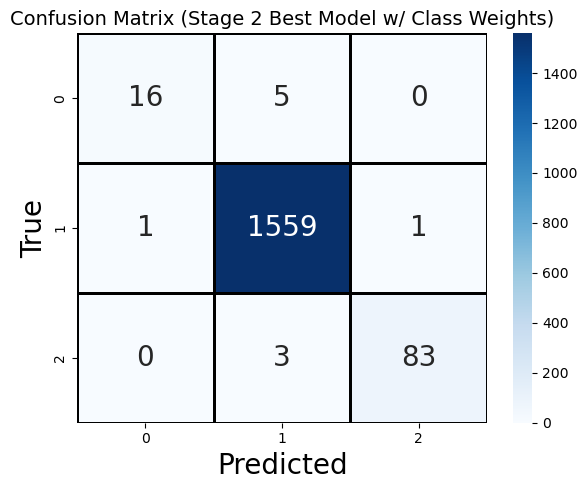

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_optimal)

# Create the plot
plt.figure(figsize=(6, 5))
ax = sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap="Blues",
    linewidths=1,  # Adds line separators
    linecolor='black',  # Line color
    annot_kws={"size": 20}  # Increases font size for numbers
)

# Titles and labels
plt.title("Confusion Matrix (Stage 2 Best Model w/ Class Weights)", fontsize=14)
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("True", fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()

These are the final results.

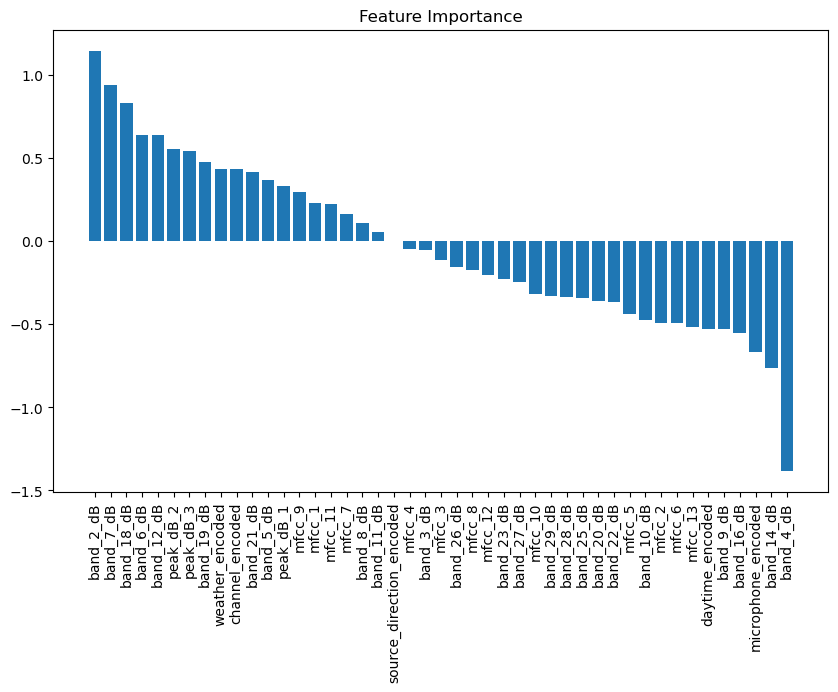

In [33]:
import numpy as np

# Plot feature importances using coefficients

# Get the coefficients from the logistic regression model
coefficients = log_reg.coef_[0]

# Get the indices of the sorted coefficients
sorted_indices = np.argsort(coefficients)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(coefficients)), coefficients[sorted_indices])
plt.xticks(range(len(coefficients)), optimal_features[sorted_indices], rotation=90)
plt.show()